In [1]:
#run from the root directory
import os

os.chdir("..")

In [2]:
import os
import pickle as pkl
from config import *
from sklearn.decomposition import PCA
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import config

In [3]:
DATA_DRIVE = "embeddings/bertEmbeddings"

In [24]:
files = os.listdir("embeddings/bertEmbeddings")
files = [f for f in files if ('2' not in f) and (f.endswith('.pkl'))]

In [25]:
files

['bert_misinfo.pkl',
 'bert_malicious_activity.pkl',
 'bert_discrimination.pkl',
 'bert_hci_harms_df.pkl']

In [26]:
from config import *

In [34]:
embeddings = []
labels = []
domains = []

for file in files:
    data = pkl.load(open(f"./{DATA_DRIVE}/" + file, "rb"))
    
    embeddings.extend(np.array(data['activations']))

    labels.extend(np.array(data['labels']))
    
    domains.extend([EMBEDDING_DOMAIN_MAPPING[file]] * len(data['labels']))

embeddings = np.array(embeddings)


In [35]:
len(domains)

80000

In [9]:
pca = PCA(n_components=0.95)
pca_embeddings = pca.fit_transform(embeddings)

tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(pca_embeddings)

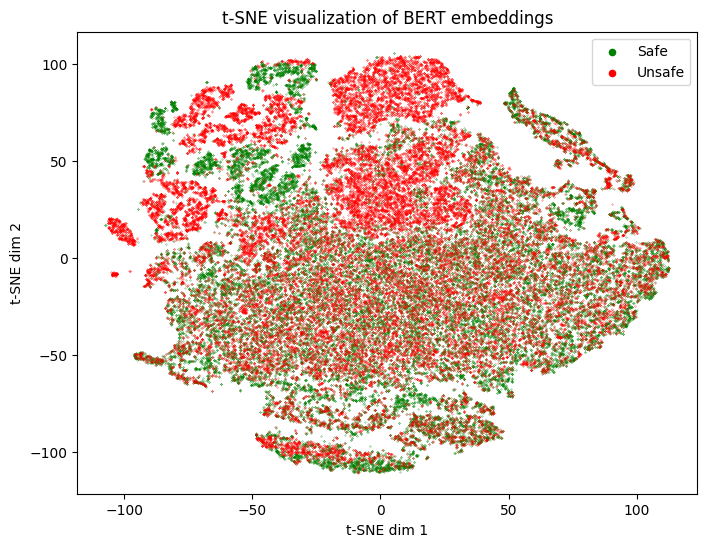

In [13]:
label2color = {0: 'green', 1: 'red'}
label2legend = {0: 'Safe', 1: 'Unsafe'}
plt.figure(figsize=(8,6))
for label in [0, 1]:
    select_indices = [i for i, x in enumerate(labels) if x == label]
    plt.scatter(tsne_embeddings[select_indices][:, 0], tsne_embeddings[select_indices][:, 1], c=label2color[label], label=label2legend[label] ,s=0.05)
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.title("t-SNE visualization of BERT embeddings")
plt.legend(markerscale=20)
plt.show()



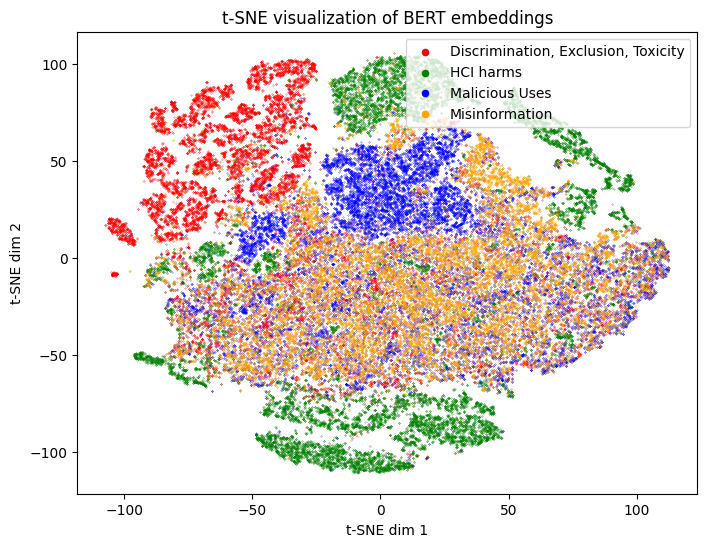

In [36]:
global2domain = {"Discrimination, Exclusion, Toxicity": 1, "HCI harms":2, "Malicious Uses": 3, "Misinformation":4}
domain2color = {"Discrimination, Exclusion, Toxicity": 'red', "HCI harms":'green', "Malicious Uses": 'blue', "Misinformation":'orange'}

plt.figure(figsize=(8,6))
for domain in global2domain.keys():
    select_labels = global2domain[domain]
    select_indices = [i for i, x in enumerate(domains) if (x==select_labels)]
    
    plt.scatter(tsne_embeddings[select_indices][:, 0], tsne_embeddings[select_indices][:, 1], c=domain2color[domain], label=domain, s=0.05)

plt.legend(markerscale=20, loc='upper right')
plt.xlabel("t-SNE dim 1")
plt.ylabel("t-SNE dim 2")
plt.title("t-SNE visualization of BERT embeddings")
plt.show()

In [39]:
id_domain_map = {v:k for k,v in DOMAIN_INDEX_MAPPING.items()}


for f in files:
    domain_id = EMBEDDING_DOMAIN_MAPPING[f]
    domain_name = id_domain_map[domain_id]

    data = pkl.load(open(f"./{DATA_DRIVE}/" + file, "rb"))
    
    bert_emb = data['activations']
    labels = data['labels']

    pca = PCA(n_components=0.95)
    pca_embeddings = pca.fit_transform(embeddings)

    tsne = TSNE(n_components=2)
    tsne_embeddings = tsne.fit_transform(pca_embeddings)

    label2color = {0: 'green', 1: 'red'}
    label2legend = {0: 'Safe', 1: 'Unsafe'}
    plt.figure(figsize=(8,6))
    for label in [0, 1]:
        select_indices = [i for i, x in enumerate(labels) if x == label]
        plt.scatter(tsne_embeddings[select_indices][:, 0], tsne_embeddings[select_indices][:, 1], c=label2color[label], label=label2legend[label] ,s=0.05)
    plt.xlabel("t-SNE dim 1")
    plt.ylabel("t-SNE dim 2")
    plt.title(f"t-SNE visualization of BERT embeddings for {domain_name}")
    plt.legend(markerscale=20)
    plt.show()



    


    

bert_misinfo.pkl Misinformation
bert_malicious_activity.pkl Malicious Uses
bert_discrimination.pkl Discrimination, Exclusion, Toxicity
bert_hci_harms_df.pkl HCI harms
